In [3]:
import numpy as np 
import os 
from PIL import Image 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
from random import randint
from sklearn.model_selection import train_test_split
from keras import layers
from keras import models
import tensorflow as tf

2023-06-24 04:30:00.132556: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/xilinx/xrt/lib:/usr/lib:/usr/lib/x86_64-linux-gnu
2023-06-24 04:30:00.132584: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# **Loading the Dataset and Preprocessing**

In [4]:
lookup = dict()
reverselookup = dict()
count = 0
for j in os.listdir('archive/leapgestrecog/leapGestRecog/00/'):
    if not j.startswith('.'): 
        lookup[j] = count
        reverselookup[count] = j
        count = count + 1
lookup

{'07_ok': 0,
 '01_palm': 1,
 '08_palm_moved': 2,
 '10_down': 3,
 '04_fist_moved': 4,
 '03_fist': 5,
 '09_c': 6,
 '06_index': 7,
 '05_thumb': 8,
 '02_l': 9}

In [5]:
x_data = []
y_data = []
datacount = 0 # 
for i in range(0, 10): 
    for j in os.listdir('archive/leapgestrecog/leapGestRecog/0' + str(i) + '/'):
        if not j.startswith('.'): 
            count = 0 
            for k in os.listdir('archive/leapgestrecog/leapGestRecog/0' + 
                                str(i) + '/' + j + '/'):
                img = Image.open('archive/leapgestrecog/leapGestRecog/0' + 
                                 str(i) + '/' + j + '/' + k).convert('L')
                img = img.resize((320, 120))
                arr = np.array(img)
                x_data.append(arr) 
                count = count + 1
            y_values = np.full((count, 1), lookup[j]) 
            y_data.append(y_values)
            datacount = datacount + count
x_data = np.array(x_data, dtype = 'float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount, 1)

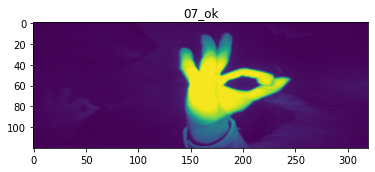

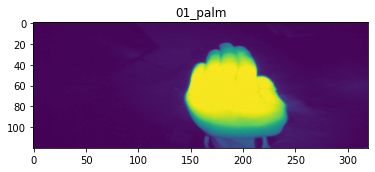

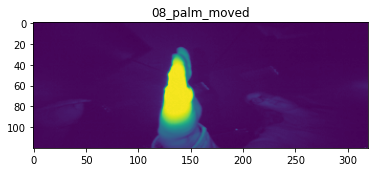

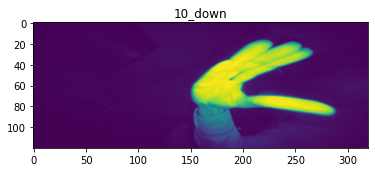

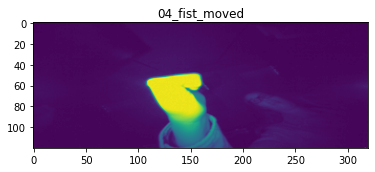

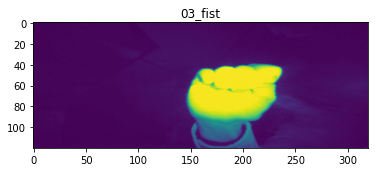

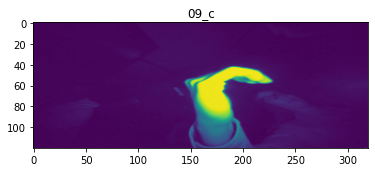

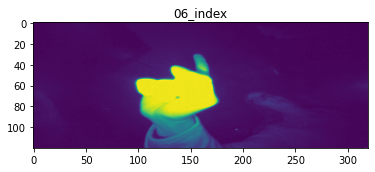

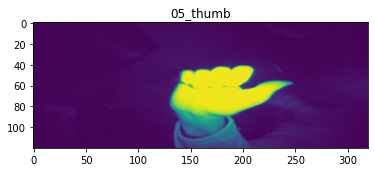

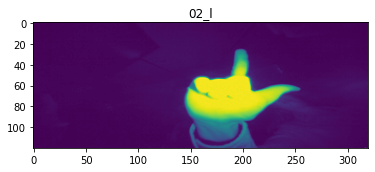

In [6]:
for i in range(0, 10):
    plt.imshow(x_data[i*200 , :, :])
    plt.title(reverselookup[y_data[i*200 ,0]])
    plt.show()

In [7]:
from keras.utils.np_utils import to_categorical


In [8]:
import keras
# from keras.utils import to_categorical
from keras.utils.np_utils import to_categorical

y_data = to_categorical(y_data)

In [9]:
x_data = x_data.reshape((datacount, 120, 320, 1))
x_data /= 255

In [10]:
x_train,x_further,y_train,y_further = train_test_split(x_data,y_data,test_size = 0.2)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.5)

# Defining the Model

**Base Model**

In [14]:
# model=models.Sequential()
# model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(120, 320,1))) 
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Flatten())
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dense(10, activation='softmax'))
# model.summary()

ImportError: cannot import name 'optimizer_v1' from 'keras.optimizers' (/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/keras/optimizers.py)

**Updated Model**

In [11]:
model=models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(120, 320,1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 58, 158, 32)       832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 79, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 77, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 38, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 36, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 18, 64)        0

2023-06-24 04:30:54.969134: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/xilinx/xrt/lib:/usr/lib:/usr/lib/x86_64-linux-gnu
2023-06-24 04:30:54.969161: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-24 04:30:54.969178: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:163] no NVIDIA GPU device is present: /dev/nvidia0 does not exist
2023-06-24 04:30:54.969524: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


**Training the Model**

In [12]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=64, verbose=1, validation_data=(x_validate, y_validate))

Epoch 1/5
250/250 [==============================] - 34s 134ms/step - loss: 0.4838 - accuracy: 0.8447 - val_loss: 0.0303 - val_accuracy: 0.9935
Epoch 2/5
250/250 [==============================] - 33s 132ms/step - loss: 0.0353 - accuracy: 0.9910 - val_loss: 0.0155 - val_accuracy: 0.9935
Epoch 3/5
250/250 [==============================] - 34s 137ms/step - loss: 0.0187 - accuracy: 0.9961 - val_loss: 5.2138e-04 - val_accuracy: 1.0000
Epoch 4/5
250/250 [==============================] - 34s 136ms/step - loss: 0.0103 - accuracy: 0.9980 - val_loss: 0.0099 - val_accuracy: 0.9965
Epoch 5/5
250/250 [==============================] - 34s 138ms/step - loss: 0.0171 - accuracy: 0.9976 - val_loss: 5.6585e-04 - val_accuracy: 0.9995


In [13]:
[loss, acc] = model.evaluate(x_test,y_test,verbose=1)

63/63 [==============================] - 1s 18ms/step - loss: 5.1837e-04 - accuracy: 0.9995


Saving the original weights of model

In [14]:
original_w = model.get_weights()

Saving the model as h5 file.

In [15]:
model.save('MyModel',save_format='h5')

# **Changing the weights of model layer by layer**

In [16]:
num_layers=3
accuracys=[]
x=num_layers
for i in range(len(original_w)-2,len(original_w)-1-2*num_layers,-2):
  accuracy=[]
  print("Layer :",x)
  for scalar in [0.001,0.01,0.1,.5, .75,1.5,1.75,2.,4.]:
    new_w=[]
    for w in range(len(original_w)):
      if(w==i):
        new_w.append(original_w[w]+scalar)
      else:
        new_w.append(original_w[w])
    model.set_weights(new_w)
    evaluation = model.evaluate(x_test, y_test)
    print("Scallar {} --> test accuracy {}".format(scalar,evaluation[1]))
    accuracy.append(evaluation[1])
    model.set_weights(original_w)
  x-=1
  model.set_weights(original_w)
  accuracys.append(accuracy)

Layer : 3
63/63 [==============================] - 1s 23ms/step - loss: 5.1837e-04 - accuracy: 0.9995
Scallar 0.001 --> test accuracy 0.9994999766349792
63/63 [==============================] - 1s 20ms/step - loss: 5.1837e-04 - accuracy: 0.9995
Scallar 0.01 --> test accuracy 0.9994999766349792
63/63 [==============================] - 1s 20ms/step - loss: 5.1837e-04 - accuracy: 0.9995
Scallar 0.1 --> test accuracy 0.9994999766349792
63/63 [==============================] - 1s 20ms/step - loss: 5.1836e-04 - accuracy: 0.9995
Scallar 0.5 --> test accuracy 0.9994999766349792
63/63 [==============================] - 1s 18ms/step - loss: 5.1838e-04 - accuracy: 0.9995
Scallar 0.75 --> test accuracy 0.9994999766349792
63/63 [==============================] - 1s 21ms/step - loss: 5.1834e-04 - accuracy: 0.9995
Scallar 1.5 --> test accuracy 0.9994999766349792
63/63 [==============================] - 1s 18ms/step - loss: 5.1836e-04 - accuracy: 0.9995
Scallar 1.75 --> test accuracy 0.999499976634979

**Plotting the graph of accuracy vs Scalars**

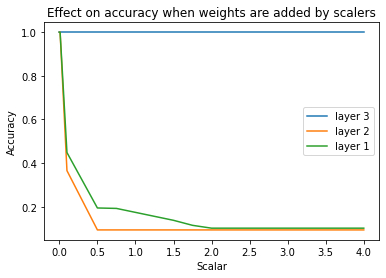

In [17]:
scalars= [0.001,0.01,0.1,.5, .75,1.5,1.75,2.,4.]
for i in range(len(accuracys)):
  plt.plot(scalars, accuracys[i], label=f'layer {num_layers-i}')
plt.xlabel('Scalar')
plt.ylabel('Accuracy')
plt.title('Effect on accuracy when weights are added by scalers')
plt.legend()
plt.show()

Average accuracy of model when weights are altered in different layers.

In [18]:
average=[]
for i in accuracys:
  average.append(sum(i)/len(i))
print(average)

[0.9994999766349792, 0.32538888189527726, 0.3657222166657448]


# Changing all the weights of model simultaneously.

In [19]:
scalars=[]
accuracys=[]
for scalar in [0.00001,0.0001,0.001, 0.05, 0.1, .25, 0.5, .75, 1., 1.1,1.5,2,3,4]:
    new_w = [scalar*w for w in original_w]
    model.set_weights(new_w)
    evaluation = model.evaluate(x_test, y_test)
    print("Scallar {} --> test accuracy {}".format(scalar,evaluation[1]))
    scalars.append(scalar)
    accuracys.append(evaluation[1])

63/63 [==============================] - 1s 19ms/step - loss: 2.3026 - accuracy: 0.0930
Scallar 1e-05 --> test accuracy 0.09300000220537186
63/63 [==============================] - 1s 19ms/step - loss: 2.3026 - accuracy: 0.0930
Scallar 0.0001 --> test accuracy 0.09300000220537186
63/63 [==============================] - 1s 19ms/step - loss: 2.3026 - accuracy: 0.0930
Scallar 0.001 --> test accuracy 0.09300000220537186
63/63 [==============================] - 1s 20ms/step - loss: 2.3026 - accuracy: 0.0930
Scallar 0.05 --> test accuracy 0.09300000220537186
63/63 [==============================] - 1s 20ms/step - loss: 2.3027 - accuracy: 0.0930
Scallar 0.1 --> test accuracy 0.09300000220537186
63/63 [==============================] - 1s 20ms/step - loss: 2.3023 - accuracy: 0.0930
Scallar 0.25 --> test accuracy 0.09300000220537186
63/63 [==============================] - 1s 19ms/step - loss: 2.1154 - accuracy: 0.8835
Scallar 0.5 --> test accuracy 0.8834999799728394
63/63 [===================

**Ploting the graph between accuracy and scalars used.**

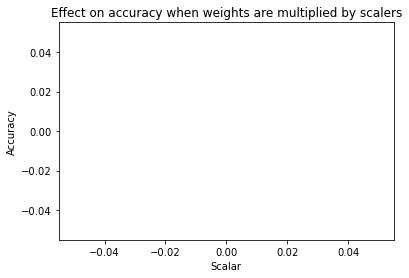

In [20]:
scalars=[]
accuracys=[]
plt.plot(scalars, accuracys)
plt.xlabel('Scalar')
plt.ylabel('Accuracy')
plt.title('Effect on accuracy when weights are multiplied by scalers')
plt.show()

# Optimizating the model by Quantization

In [21]:
model1 = tf.keras.models.load_model('MyModel')

converter = tf.lite.TFLiteConverter.from_keras_model(model1)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]
quantized_model = converter.convert()

with open('quantized_model.tflite', 'wb') as f:
    f.write(quantized_model)

2023-06-24 04:36:46.809810: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /tmp/tmpe9bjb91a/assets


2023-06-24 04:36:48.523040: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored output_format.
2023-06-24 04:36:48.523070: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored drop_control_dependency.
2023-06-24 04:36:48.524111: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /tmp/tmpe9bjb91a
2023-06-24 04:36:48.526848: I tensorflow/cc/saved_model/reader.cc:78] Reading meta graph with tags { serve }
2023-06-24 04:36:48.526869: I tensorflow/cc/saved_model/reader.cc:119] Reading SavedModel debug info (if present) from: /tmp/tmpe9bjb91a
2023-06-24 04:36:48.552647: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2023-06-24 04:36:48.652105: I tensorflow/cc/saved_model/loader.cc:212] Running initialization op on SavedModel bundle at path: /tmp/tmpe9bjb91a
2023-06-24 04:36:48.699231: I tensorflow/cc/saved_model/loader.cc:301] SavedModel load for tags { serve }; Status: success: OK. Took 175122 

#Optimizating the model by Pruning

In [21]:
!pip install -q tensorflow-model-optimization

In [23]:
import tensorflow as tf
from tensorflow_model_optimization.sparsity import keras as sparsity
model = tf.keras.models.load_model('MyModel')
pruning_params = {'pruning_schedule': sparsity.PolynomialDecay(initial_sparsity=0.5,final_sparsity=0.9,begin_step=0,end_step=1000),'block_size': (1, 1),'block_pooling_type':'AVG'}
pruned_model = sparsity.prune_low_magnitude(model, **pruning_params)
pruned_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])
pruned_model.fit(x_train, y_train,
                 batch_size=64,
                 epochs=10,
                 validation_data=(x_validate, y_validate))

final_model = sparsity.strip_pruning(pruned_model)

# Save the pruned model
final_model.save('pruned_model.h5')

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'sequential/prune_low_magnitude_conv2d/assert_greater_equal/Assert/AssertGuard/Assert' defined at (most recent call last):
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/traitlets/config/application.py", line 976, in launch_instance
      app.start()
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/asyncio/base_events.py", line 541, in run_forever
      self._run_once()
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/asyncio/base_events.py", line 1786, in _run_once
      handle._run()
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/asyncio/events.py", line 88, in _run
      self._context.run(self._callback, *self._args)
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 508, in dispatch_queue
      await self.process_one()
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 497, in process_one
      await dispatch(*args)
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 404, in dispatch_shell
      await result
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 728, in execute_request
      reply_content = await reply_content
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 387, in do_execute
      cell_id=cell_id,
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2975, in run_cell
      raw_cell, store_history, silent, shell_futures, cell_id
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3029, in _run_cell
      return runner(coro)
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async
      interactivity=interactivity, compiler=compiler, result=result)
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3472, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3552, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_112/159763027.py", line 12, in <module>
      validation_data=(x_validate, y_validate))
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/keras/engine/training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/keras/engine/training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/keras/engine/training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/keras/engine/training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/keras/engine/training.py", line 859, in train_step
      y_pred = self(x, training=True)
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/keras/engine/base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/keras/engine/sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/keras/engine/functional.py", line 452, in call
      inputs, training=training, mask=mask)
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/keras/engine/functional.py", line 589, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/keras/engine/base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/tensorflow_model_optimization/python/core/sparsity/keras/pruning_wrapper.py", line 280, in call
      update_mask = utils.smart_cond(training, add_update, no_op)
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/tensorflow_model_optimization/python/core/keras/utils.py", line 50, in smart_cond
      if isinstance(pred, variables.Variable):
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/tensorflow_model_optimization/python/core/keras/utils.py", line 54, in smart_cond
      pred, true_fn=true_fn, false_fn=false_fn, name=name)
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/tensorflow_model_optimization/python/core/sparsity/keras/pruning_wrapper.py", line 262, in add_update
      with tf.control_dependencies([
Node: 'sequential/prune_low_magnitude_conv2d/assert_greater_equal/Assert/AssertGuard/Assert'
assertion failed: [Prune() wrapper requires the UpdatePruningStep callback to be provided during training. Please add it as a callback to your model.fit call.] [Condition x >= y did not hold element-wise:] [x (sequential/prune_low_magnitude_conv2d/assert_greater_equal/ReadVariableOp:0) = ] [0] [y (sequential/prune_low_magnitude_conv2d/assert_greater_equal/y:0) = ] [1]
	 [[{{node sequential/prune_low_magnitude_conv2d/assert_greater_equal/Assert/AssertGuard/Assert}}]] [Op:__inference_train_function_29282]

In [22]:
from tensorflow_model_optimization.quantization.keras import vitis_quantize

In [23]:
quantizer = vitis_quantize.VitisQuantizer(model)
quantized_model = quantizer.quantize_model(calib_dataset = x_test, weight_bit=8, activation_bit=8)

quantized_model.compile(loss='categorical_crossentropy', metrics=["accuracy"])

score = quantized_model.evaluate(x_test , y_test ,verbose=0, batch_size=1)
print(score)
print('last')
quantized_model.save('gesture_cs001.h5')

[VAI INFO] Update activation_bit: 8
[VAI INFO] Update weight_bit: 8
[VAI INFO] Start CrossLayerEqualization...
10/10 [==============================] - 2s 210ms/step
[VAI INFO] CrossLayerEqualization Done.
[VAI INFO] Start Quantize Calibration...
63/63 [==============================] - 17s 177ms/step
[VAI INFO] Quantize Calibration Done.
[VAI INFO] Start Post-Quant Model Refinement...
[VAI INFO] Start Quantize Position Ajustment...
[VAI INFO] Quantize Position Ajustment Done.
[VAI INFO] Post-Quant Model Refninement Done.
[VAI INFO] Start Model Finalization...
[VAI INFO] Model Finalization Done.
[VAI INFO] Quantization Finished.
[0.0, 1.0]
last
